<br><br><br><br><br><br>

## CNN으로 신경망 구현<br><br><br><br>

    기존층의 문제점
    합성곱 계층의 개념과 파이썬으로 구현
        1. im2col 함수 이용 (이미지 → 행렬)
        2. reshape 의 -1 이용 (4차원 행렬(가중치) → 2차원)
    풀링 계층의 개념과 파이썬으로 구현

<hr>
### 합성곱 신경망 이란?
    Convolution 층과 pooling 층을 포함하는 신경망

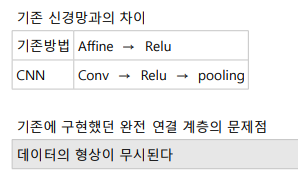

In [1]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처1.png")

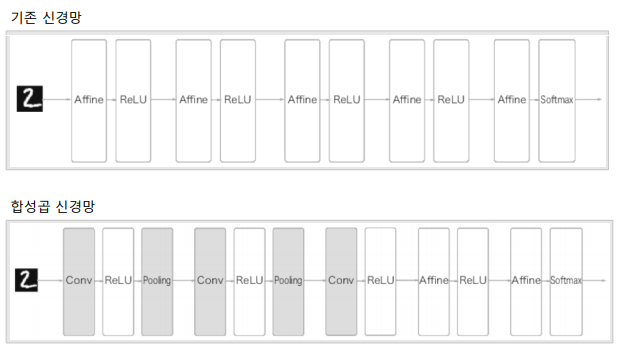

In [2]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

## 합성곱 계층 (Convolution Layer)

합성곱 계층의 역할 : 

" feature map 을 만들고 그 feature map 을 선명하게 해주는 층 "

### CNN을 이용하지 않은 기존층의 문제점

    필기체 데이터를 28 x 28 = 784 의 1차원 데이터로 변경을 해서 784개의 데이터를 첫 Affine 계층에 입력한게 기존 방법이다
    따라서, 형상을 무시하고 모든 입력 데이터를 동등한 뉴런으로 취급하기 때문에 이미지가 갖는 본질적인 패턴을 읽지 못한다.
    

    결국 원본 이미지에서 조금만 모양이 달라져도 같은 이미지로 인식하지 못하는 문제를 합성곱이 해결해 줄 수 있다
    　
     　
##### 어떻게 해결 하는지 ?

    원본이미지를 가지고 여러 개의 feature map 을 만들어서 분류하는 완전 연결 계층에 입력한다

### 합성곱 연산

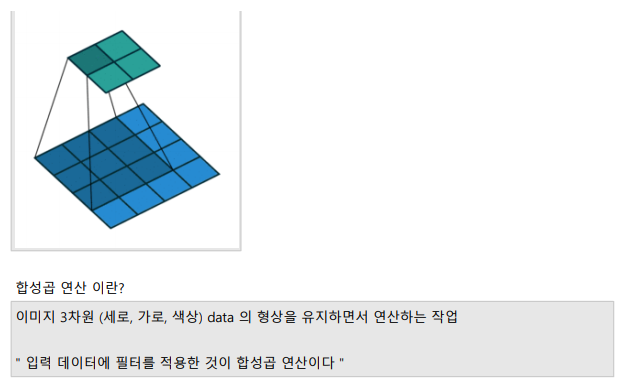

In [3]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

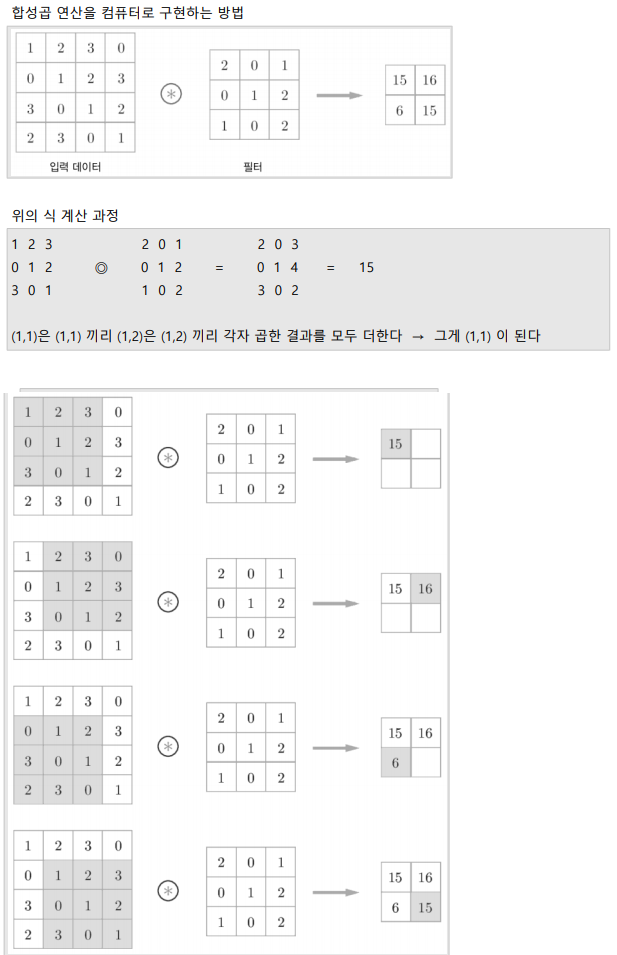

In [4]:
Image.open("C:\\Users\\QIA\\Desktop\\캡쳐1.png")

문제 173) 아래의 두 행렬을 만들고 합성곱한 결과인 15를 파이썬으로 출력하시오

    1 2 3 　　 2 0 1 　　 2 0 3
    0 1 2  ◎  0 1 2   =  0 1 4  =  15
    3 0 1 　　 1 0 2 　　 3 0 2

In [5]:
import numpy as np
A = np.array([[1,2,3],
 [0,1,2],
 [3,0,1]])
B = np.array([[2,0,1],
 [0,1,2],
 [1,0,2]])
AB = A * B
np.sum(AB)

15

문제 177) 아래의 합성곱을 파이썬으로 구현하시오


    1 2 3 0
    0 1 2 3 　　 2 0 1
    3 0 1 2  ◎  0 1 2 = [15, 16, 6, 15]
    2 3 0 1 　　 1 0 2 

In [7]:
import numpy as np
A = np.array([[1,2,3,0],
 [0,1,2,3],
 [3,0,1,2],
 [2,3,0,1]])
filter = np.array([[2,0,1],
 [0,1,2],
 [1,0,2]])
row_size = len(A[0])
col_size = len(A)
result = []
for i in range(row_size-2):
    for j in range(col_size-2):
        result.append(np.sum(A[i:i+3, j:j+3]*filter))
print(np.reshape(result, (2,2)))

[[15 16]
 [ 6 15]]


문제 179) 아래의 그림의 convolution 연산을 파이썬으로 구현하시오

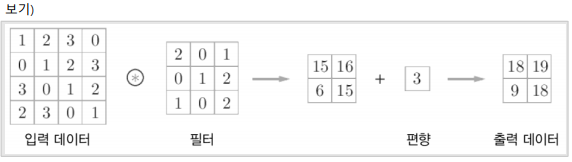

In [8]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

In [9]:
import numpy as np
A = np.array([[1,2,3,0],
 [0,1,2,3],
 [3,0,1,2],
 [2,3,0,1]])
filter = np.array([[2,0,1],
 [0,1,2],
 [1,0,2]])
row_size = len(A[0])
col_size = len(A)
result = []
for i in range(row_size-2):
    for j in range(col_size-2):
        result.append(np.sum(A[i:i+3, j:j+3]*filter))

res = np.reshape(result, (2,2))
bias = 3
print(res + bias)

[[18 19]
 [ 9 18]]


### 패딩 (Padding)

" 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정값으로 채워 늘리는 것을 말한다 "

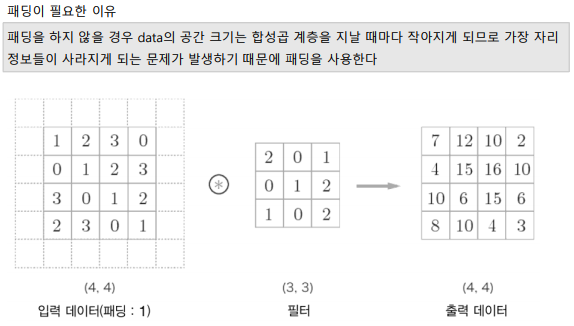

In [10]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

문제 181) 4 x 4 행렬에 3 x 3 필터를 적용해서 결과로 4 x 4 행렬이 출력되게 하려면 제로 패딩을 몇을 해줘야 하는가?

In [11]:
import numpy as np
r = np.array([[15,16], [6,15]])
r_pad = np.pad(r, pad_width=2, mode='constant', constant_values=0)
print(r_pad)

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0 15 16  0  0]
 [ 0  0  6 15  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]


### 스트라이드 (Stride)

" 필터를 적용하는 위치의 간격 "


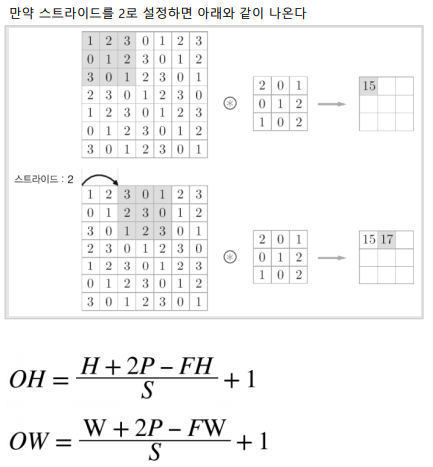

In [13]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

문제 183) 입력 이미지 4 x 4 행렬에 필터 3 x 3 행렬을 합성곱한 결과 행렬이 4 x 4 행렬이 되려면 패딩이 몇인지 출력하시오


In [15]:
P = ((4 - 1) * 1 - 4 + 3) / 2
P

1.0

문제 184) 위의 패딩 공식을 구현하는 파이썬 함수를 생성하시오

In [16]:
def padding(H, S, OH, FH):
    P = ((OH-1)*S - (H-FH)) / 2
    return P
print(padding(4, 1, 4, 3))

1.0
